In [48]:
import matplotlib.pyplot as plt

def times_asymmetric():
    with open("asymmetric_times.txt") as file:
        data = file.read().split("\n")
        
        times = dict()
        
        n = 0
        for line in data:
            if line:
                if line[0] == "N":
                    n = int(line.split(" ")[2])
                    times[n] = []
                else:
                    times[n].append(int(line))
        
        average_times = dict()
        for n, time_list in times.items():
            average_times[n] = sum(time_list) / len(time_list)
            
        return average_times

    
def get_average_time(action, data):    
    times = dict()
        
    n = 0
    for line in data:
        if line:
            if line[0] == "N":
                n = int(line.split(" ")[2])
                times[n] = []
            elif line[0] == action:
                times[n].append(int(line.split(" ")[1]))

    average_times = dict()
    for n, time_list in times.items():
        average_times[n] = sum(time_list) / len(time_list)

    return average_times
    
    
def times_conductor():
    with open("conductor_times.txt") as file:
        data = file.read().split("\n")
        
        return get_average_time("f", data), get_average_time("c", data)
    

def plot():
    asymmetric = times_asymmetric()
    forks, conductor = times_conductor()
    
    _, ax = plt.subplots(1, 3, figsize=(14, 7))

    ax[0].scatter(asymmetric.keys(), asymmetric.values())
    ax[1].scatter(forks.keys(), forks.values())
    ax[2].scatter(conductor.keys(), conductor.values())
    
    ax[0].set_title("Asymmetric")
    ax[0].set_xlabel("Philosophers")
    ax[0].set_ylabel("Average time (ms)");
    ax[0].set_xscale("log")
    ax[0].set_xticks([2, 3, 4, 5, 7, 10, 20, 50, 100])
    ax[0].set_xticklabels([2, 3, 4, 5, 7, 10, 20, 50, 100])
    
    ax[1].set_title("Conductor (forks)")
    ax[1].set_xlabel("Philosophers")
    ax[1].set_ylabel("Average time (ms)")

    ax[2].set_title("Conductor (conductor)")
    ax[2].set_xlabel("Philosophers")
    ax[2].set_ylabel("Average time (ms)")
    
    plt.show()

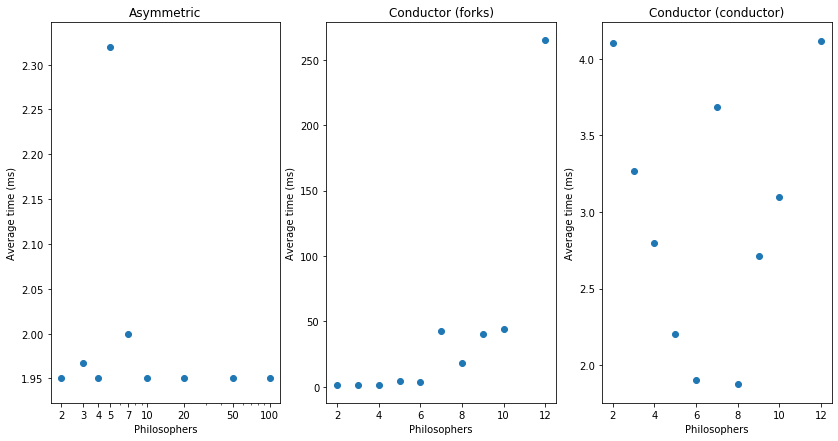

In [49]:
plot()